In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "data/dogscats/"
#PATH = "data/competitions/dogs-vs-cats-redux-kernels-edition/"
sz=224

In [4]:
!ls data


competitions  dogscats	dogscats.zip  testdogcats


In [5]:
print(torch.cuda.is_available(), torch.backends.cudnn.enabled)

True True


In [6]:
imgs = os.listdir(f'{PATH}/train)

SyntaxError: EOL while scanning string literal (<ipython-input-6-44d49a1ed105>, line 1)

In [7]:
arch=resnet34
tfms_data=tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data=ImageClassifierData.from_paths(PATH,tfms=tfms_data)
learn=ConvLearner.pretrained(arch, data, precompute=True)

In [ ]:
data=ImageClassifierData.from_csv()

In [17]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 86%|████████▌ | 308/360 [00:05<00:01, 51.93it/s, loss=0.433] 


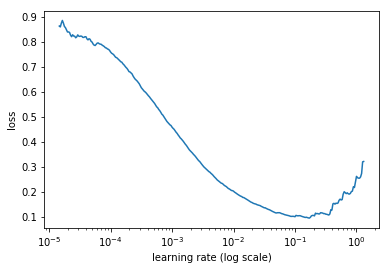

In [24]:
learn.sched.plot()

In [25]:
learn.fit(1e-2,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.048813   0.027638   0.989746  
    1      0.049974   0.023971   0.990234                     



[0.023971019, 0.990234375]

In [26]:
learn.save('base')

In [29]:
learn.precompute = False
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.039982   0.022021   0.992676  
    1      0.042862   0.023128   0.990234                     
    2      0.036773   0.02361    0.992188                     



[0.023609985, 0.9921875]

In [30]:
learn.unfreeze()

In [33]:
learn.save('224_aug_3')

In [31]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 67%|██████▋   | 242/360 [02:07<01:02,  1.89it/s, loss=0.246] 

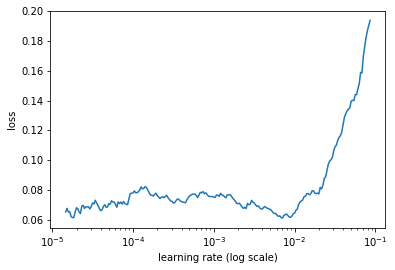

In [32]:
learn.sched.plot()

In [36]:
lrs = np.array([1e-4, 1e-3, 1e-2])
learn.lr_find(lrs/1000)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  4%|▍         | 16/360 [00:09<03:16,  1.75it/s, loss=0.0891]

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 78%|███████▊  | 281/360 [02:27<00:41,  1.91it/s, loss=0.26]  


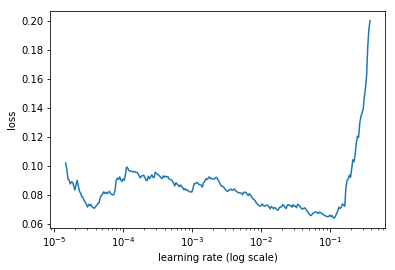

In [37]:
learn.sched.plot()

In [40]:
lrs = [1e-4,9e-4,7e-3]
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.055414   0.02528    0.990723  
    1      0.035687   0.019466   0.992188                     
    2      0.031353   0.019784   0.992188                     
    3      0.03072    0.020443   0.991699                     
    4      0.021517   0.021012   0.992676                     
    5      0.021789   0.020094   0.993652                     
    6      0.019403   0.019352   0.993652                     



[0.019352309, 0.99365234375]

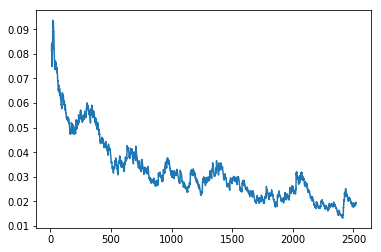

In [43]:
learn.sched.plot_loss()

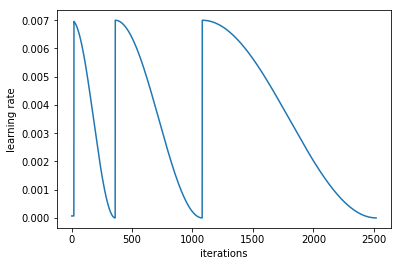

In [44]:
learn.sched.plot_lr()

In [45]:
learn.save('224_fulltrained')

In [70]:
data2=ImageClassifierData.from_paths(PATH,tfms=tfms_data,test_name='test')
learn.set_data(data2)

In [97]:
data = data2

In [84]:
data2.test_ds.fnames
None

In [159]:
log_preds,y_preds = learn.TTA(is_test=True)

In [181]:
probs = np.mean(np.exp(all_log_preds),0)[:,1]
probs

array([ 0.99983,  0.00008,  0.99145, ...,  0.9999 ,  0.     ,  0.00001], dtype=float32)

In [173]:
probs = np.exp(log_preds[:,1])
preds = np.argmax(log_preds, axis=1)

In [113]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_y(y): return rand_by_mask(preds == y)
def plot_test_with_title(idxs, title):
    imgs = np.stack([data.test_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.test_ds.denorm(imgs), rows=1, titles=title_probs)

In [114]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

Random dogs


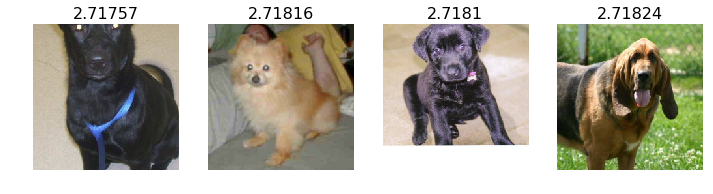

In [178]:
plot_test_with_title(rand_by_y(1), "Random dogs")

Random cats


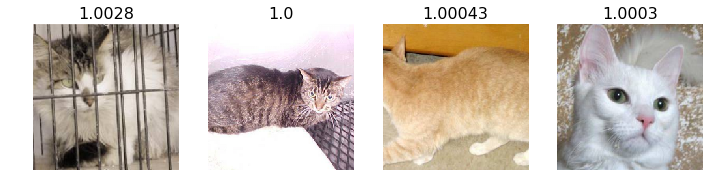

In [177]:
plot_test_with_title(rand_by_y(0), "Random cats")

In [120]:
import pandas as pd

In [153]:
def extract_number(fname): return re.search('test/(\d*).jpg', fname).group(1)
numbers = [int(extract_number(fname)) for fname in data.test_ds.fnames]

In [182]:
df = pd.DataFrame({'id': numbers, 'label': probs})
data_path = 'data/competitions/dogs-vs-cats-redux-kernels-edition'
df.to_csv(f'{data_path}/tta_sumbmission.csv',index=False,float_format='%.10f')